In [6]:
image_size = 128

In [6]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from tqdm import tqdm
import math

In [10]:
DATA_DIR = "/root/autodl-tmp/cervical_spine/"
TRAIN_IMAGE_DIR = os.path.join(DATA_DIR, "train_images_npy_croped")
TRAIN_SEG_DIR = os.path.join(DATA_DIR, "segmentations_npy_croped")

In [12]:
nii_files = glob.glob(TRAIN_SEG_DIR + "/*.npy")

In [4]:
len(nii_files)

87

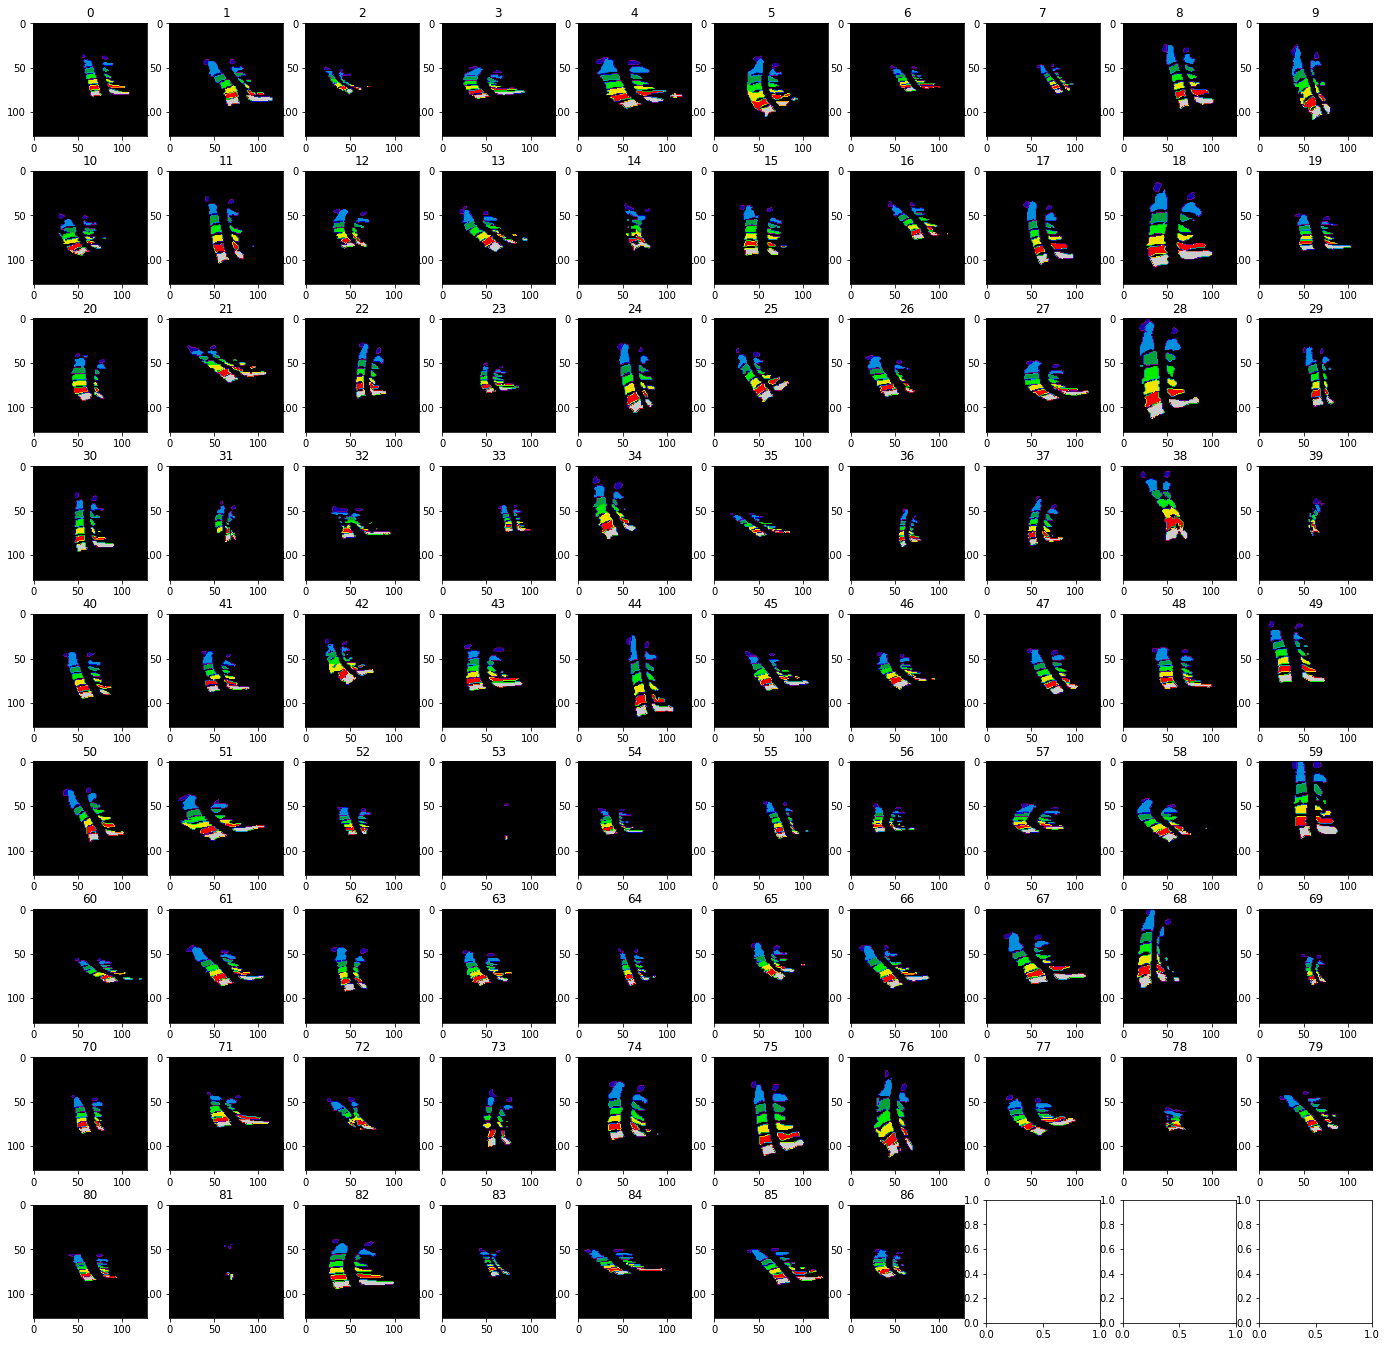

In [16]:
_, axs = plt.subplots(math.ceil(len(nii_files) / 10), 10, figsize=(24, 24))

for i, path in enumerate(nii_files):
    data = np.load(path)
    # print(data.shape)
    axs[i//10, i % 10].imshow(data[0, :, :, 64] / 7., cmap='nipy_spectral')
    axs[i//10, i % 10].set_title(i)

In [15]:
# for i in [7, 25, 30, 31, 33, 61]:
#     path = nii_files[i]
#     data = np.load(path)
#     data = np.flip(data, axis=1)
#     np.save(path, data)

In [4]:
# nii_cache = []
# for nii_file in nii_files:
#     data = np.load(nii_file)
#     nii_cache.append(data)

In [7]:
from monai.transforms import Compose, RandFlipd, RandAffined, Spacing, SpatialPadd, RandSpatialCropd, Resized, CenterSpatialCropd
val_tf = Compose(transforms=[
    SpatialPadd(keys=['image', 'mask'], spatial_size=512, allow_missing_keys=True),
    CenterSpatialCropd(keys=['image', 'mask'], roi_size=512, allow_missing_keys=True),
    Resized(keys=['image', 'mask'], spatial_size=(image_size, image_size, image_size), mode='nearest', allow_missing_keys=True),
])

In [16]:
def crop_save_seg_data(path, save_path):
    data = np.load(path).astype(np.uint8)
    data = np.expand_dims(data, 0)
    new_data = val_tf({'image':data})['image']
    np.save(save_path, new_data)


In [18]:
nii_files = glob.glob(TRAIN_SEG_DIR + "/*.npy")
for nii_file in tqdm(nii_files):
    save_path = nii_file.replace('segmentations_npy', 'segmentations_npy_croped')
    crop_save_seg_data(nii_file, save_path)

100%|██████████| 87/87 [03:03<00:00,  2.11s/it]


In [27]:
def crop_save_image_data(path, save_path):
    data = np.load(path)
    data = np.expand_dims(data, 0)
    new_data = val_tf({'image':data})['image']
    np.save(save_path, new_data)

(1, 128, 128, 128)


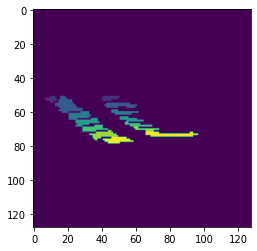

In [31]:
new_data = np.load('/root/autodl-tmp/cervical_spine/segmentations_npy_croped/1.2.826.0.1.3680043.8744.npy')
print(new_data.shape)
plt.imshow(new_data[0, :, :, 64])

In [28]:
nii_files = glob.glob(TRAIN_IMAGE_DIR + "/*.npy")
for nii_file in tqdm(nii_files):
    save_path = nii_file.replace('train_images_npy', 'train_images_npy_croped')
    crop_save_image_data(nii_file, save_path)

100%|██████████| 87/87 [01:46<00:00,  1.23s/it]


(1, 128, 128, 128)


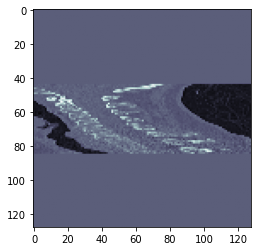

In [30]:
new_data = np.load('/root/autodl-tmp/cervical_spine/train_images_npy_croped/1.2.826.0.1.3680043.8744.npy')
print(new_data.shape)
plt.imshow(new_data[0, :, :, 64], cmap='bone')